In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
data = pd.read_csv(r'dataset\Country-data.csv')
data.head(3)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


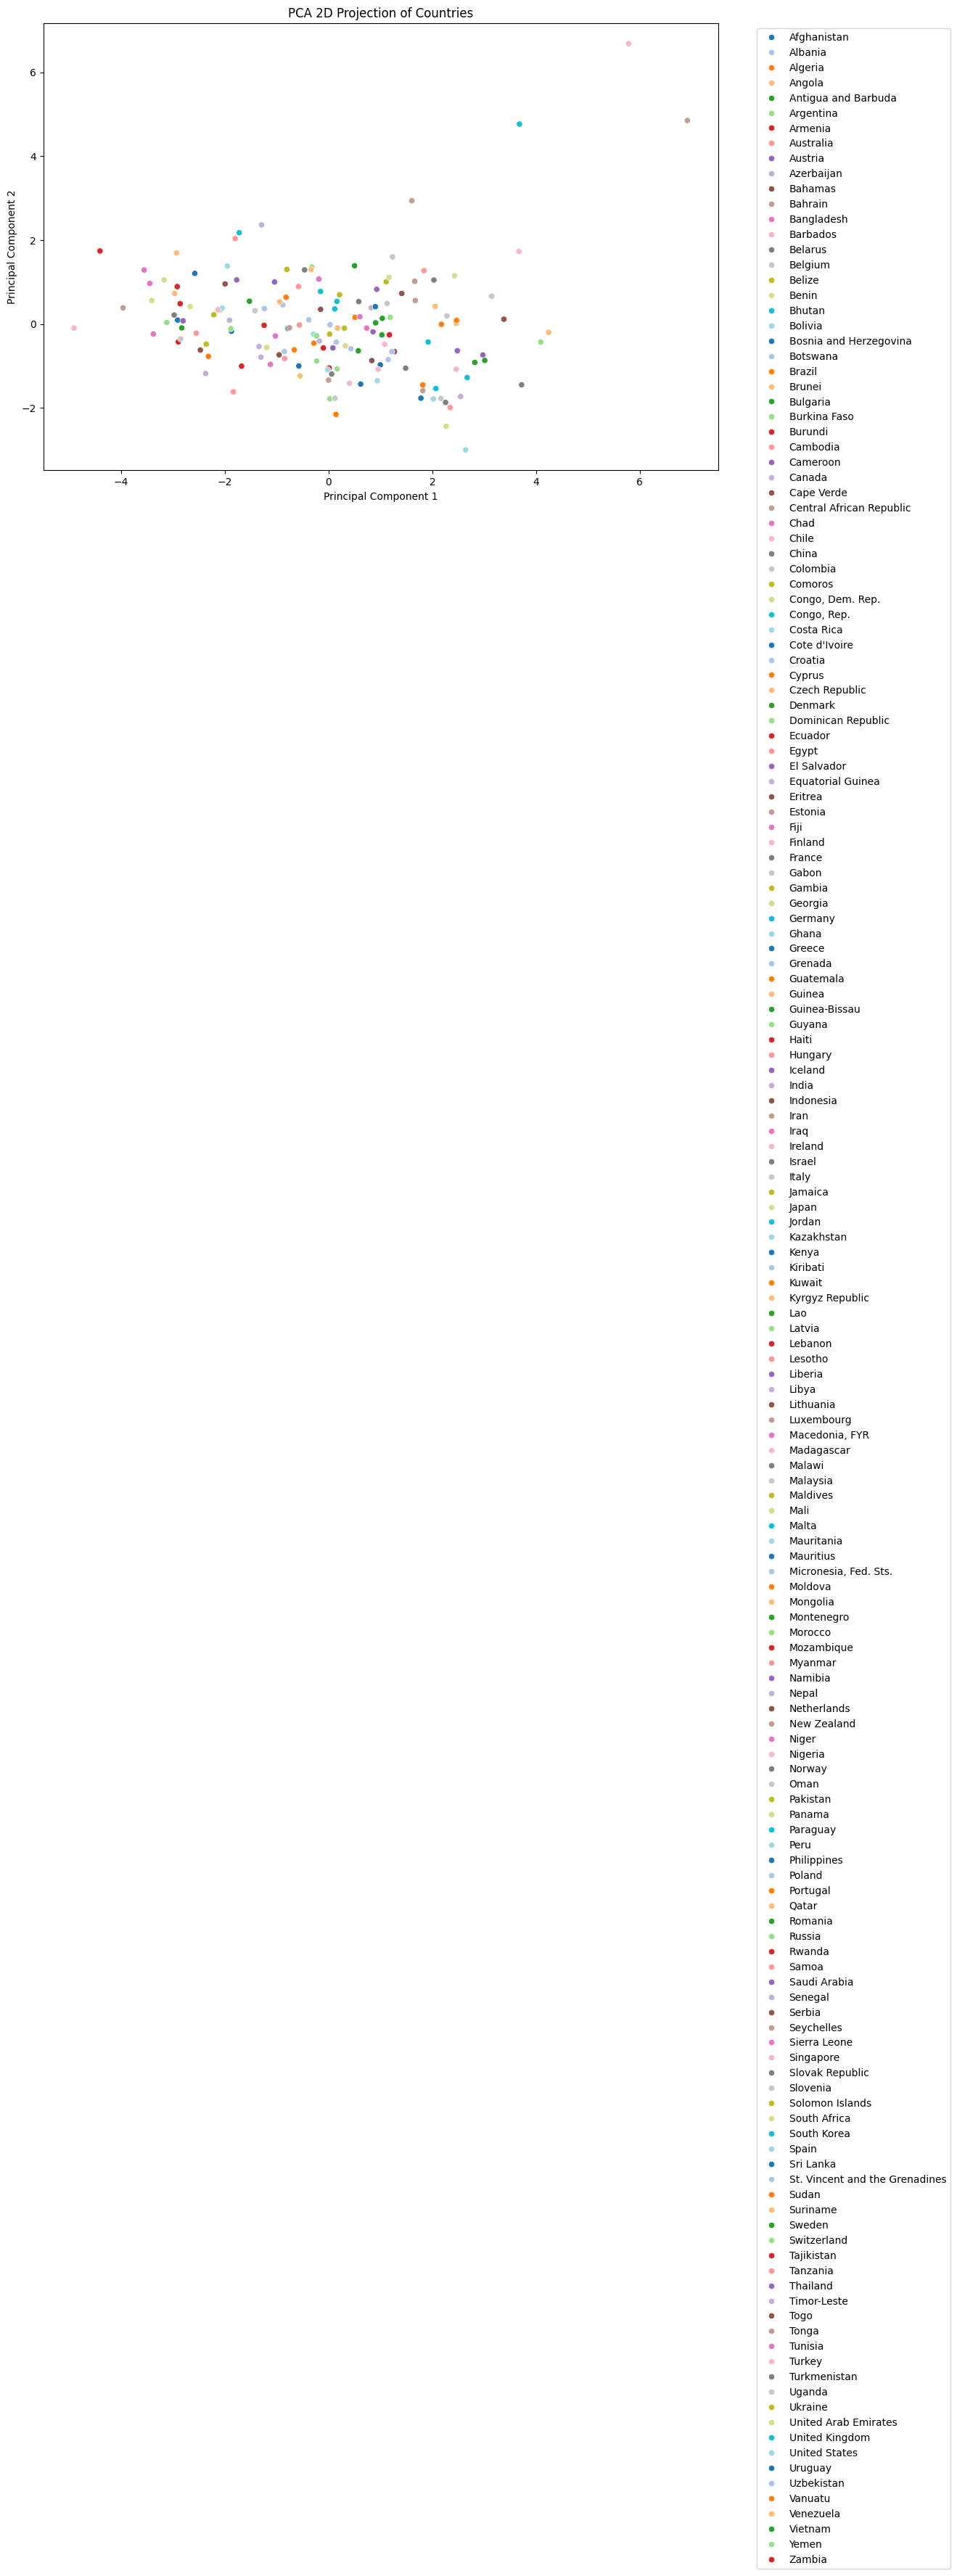

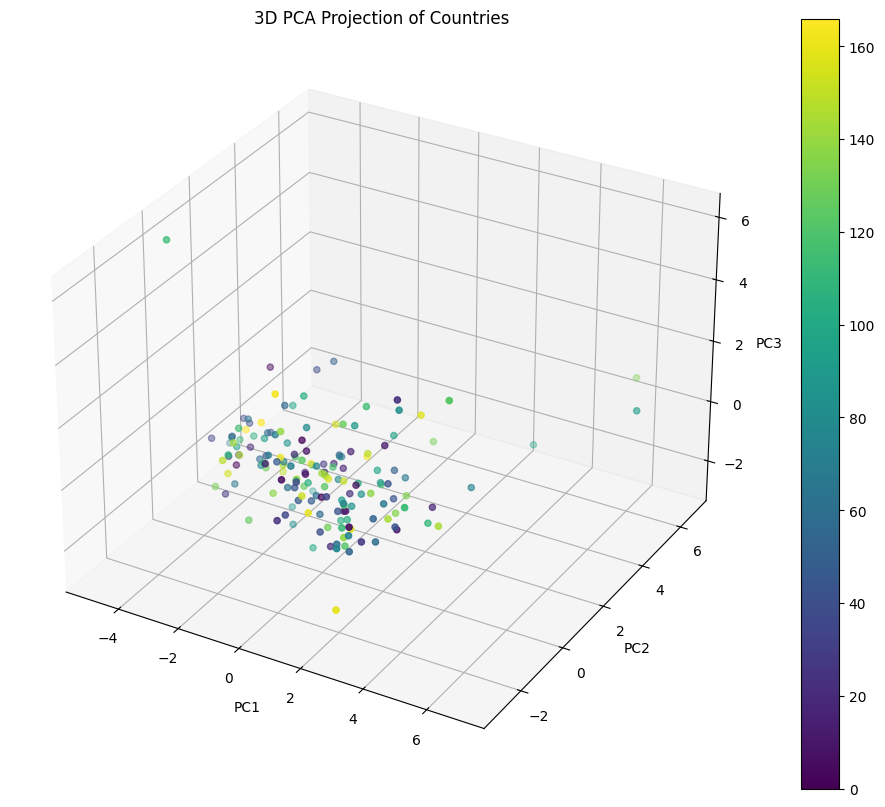

Explained Variance Ratio: [0.4595174  0.17181626 0.13004259]
Feature Importance for Principal Components:
     child_mort   exports    health   imports    income  inflation  \
PC1   -0.419519  0.283897  0.150838  0.161482  0.398441  -0.193173   
PC2    0.192884  0.613163 -0.243087  0.671821  0.022536  -0.008404   
PC3   -0.029544  0.144761 -0.596632 -0.299927  0.301548   0.642520   

     life_expec  total_fer      gdpp  
PC1    0.425839  -0.403729  0.392645  
PC2   -0.222707   0.155233 -0.046022  
PC3    0.113919   0.019549  0.122977  


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data (assuming 'df' is your dataset with countries as rows and features as columns)
# df = pd.read_csv('your_data.csv')  # Example data loading

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(data.drop('country', axis=1))  # Assuming 'Country' column identifies the country

# Apply PCA
pca = PCA(n_components=3)  # Adjust to 2 or 3 based on visualization needs
X_pca = pca.fit_transform(X_std)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['country'] = data['country']  # Add country information

# Visualize 2D PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='country', data=pca_df, palette='tab20')
plt.title("PCA 2D Projection of Countries")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.show()

# Visualize 3D PCA if needed
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=np.arange(len(data)), cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("3D PCA Projection of Countries")
plt.colorbar(scatter, ax=ax)
plt.show()

# Display explained variance
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Determine feature importance in each component
components = pca.components_
feature_importance_df = pd.DataFrame(components, columns=data.columns[1:], index=['PC1', 'PC2', 'PC3'])
print("Feature Importance for Principal Components:")
print(feature_importance_df)


In [26]:
pca_df.head(3)

,PC1,PC2,PC3,country
0,-2.913025,0.095621,-0.718118,Afghanistan
1,0.429911,-0.588156,-0.333486,Albania
2,-0.285225,-0.455174,1.221505,Algeria


In [27]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC1      167 non-null    float64
 1   PC2      167 non-null    float64
 2   PC3      167 non-null    float64
 3   country  167 non-null    object 
dtypes: float64(3), object(1)
memory usage: 5.3+ KB


In [28]:
pca_df.describe()

,PC1,PC2,PC3
count,1.670000e+02,1.670000e+02,1.670000e+02
mean,-8.509494e-17,2.127373e-17,-2.659217e-18
std,2.039748e+00,1.247262e+00,1.085096e+00
min,-4.912066e+00,-2.997364e+00,-2.714085e+00
25%,-1.382270e+00,-7.520480e-01,-5.218776e-01
50%,2.240726e-02,-9.449868e-02,-2.456059e-01
75%,1.224328e+00,5.534747e-01,4.025451e-01
max,6.917755e+00,6.682090e+00,6.110158e+00


In [29]:
pca_df.isna().sum()

PC1        0
PC2        0
PC3        0
country    0
dtype: int64

Accuracy: 0.0

Classification Report:
                                 precision    recall  f1-score   support

                   Afghanistan       0.00      0.00      0.00       0.0
                       Algeria       0.00      0.00      0.00       1.0
                       Armenia       0.00      0.00      0.00       0.0
                    Azerbaijan       0.00      0.00      0.00       1.0
                    Bangladesh       0.00      0.00      0.00       1.0
                       Belarus       0.00      0.00      0.00       0.0
                       Belgium       0.00      0.00      0.00       1.0
                        Belize       0.00      0.00      0.00       1.0
                         Benin       0.00      0.00      0.00       0.0
                        Bhutan       0.00      0.00      0.00       1.0
                       Bolivia       0.00      0.00      0.00       1.0
        Bosnia and Herzegovina       0.00      0.00      0.00       0.0
                      Bo

c:\Users\mariand\ml-lab\ml_lab6\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mariand\ml-lab\ml_lab6\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mariand\ml-lab\ml_lab6\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\

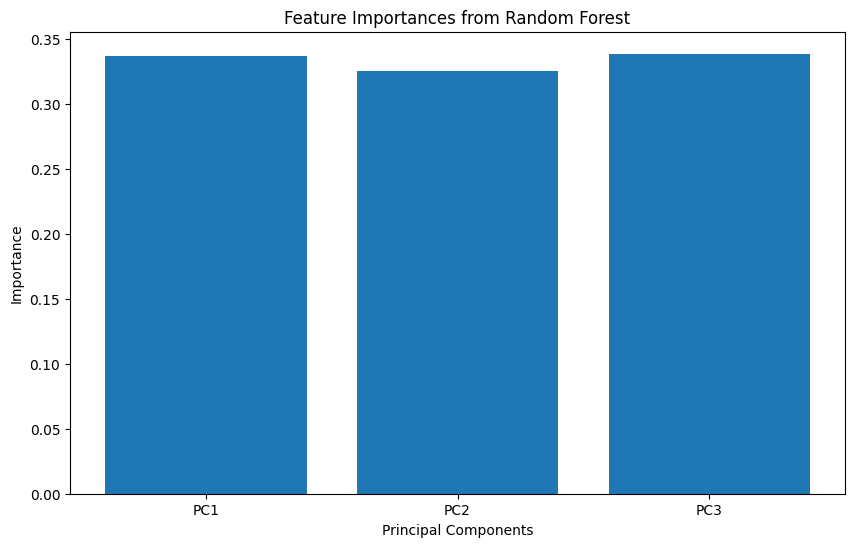

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = pca_df.drop('country', axis=1)  # PCA-reduced features
y = pca_df['country']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier (e.g., RandomForestClassifier)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize feature importances
importances = classifier.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Principal Components')
plt.ylabel('Importance')
plt.show()